## Table of Contents:
* [1. Graph theory basics](#graph-theory-basics)  
* [1.1. draw graphs](#draw-graphs) 
* [1.2. adjacency matrix](#adjacency-matrix)   
* [1.3. adjacency lists](#adjacency-list)  
    
* [2. Paths and cycles](#paths-and-cycles)
* [2.1. Matrix production](#matrix-production)
* [2.2. Find connected components of an undirected network](#connected-components)
* [2.3. Find Euclerian cycles and paths](#euclerian)

In [1]:
# import required packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## 1.1 draw graphs <a name="draw-graph"></a>

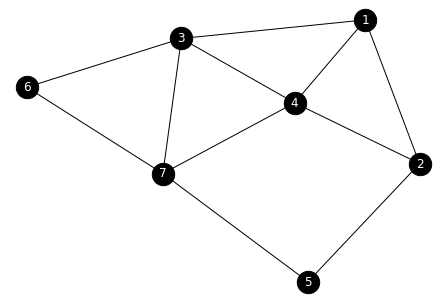

In [2]:
### let's draw the graph in figure.1
G = nx.Graph()
G.add_edges_from([(1, 2),(1, 3),(1, 4),(2,4),(2,5),(3,4),(3,6),(3,7),(4,7),(5,7),(6,7)])
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white")
plt.show()
# note the layout might be different from Fig. 1, but the connections among nodes are the same.

In [3]:
### let's draw the directed graph in Fig.3

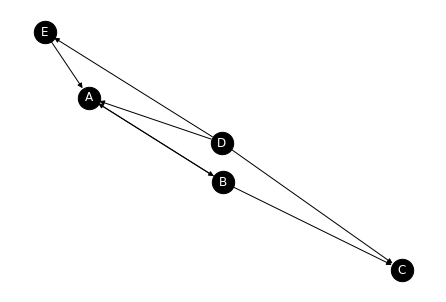

In [4]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'A'), ('B', 'C'), ('D', 'C'), ('D', 'A'),
     ('D', 'E'), ('E', 'A')])

nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white")
plt.show()
# note the layout might be different from Fig. 3, but the connections among nodes are the same.

In [5]:
### let's add some edge weights to the above network

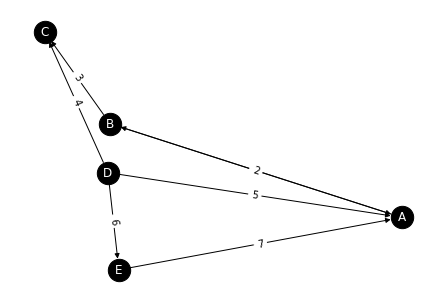

In [6]:
G = nx.DiGraph()
G.add_weighted_edges_from([('A', 'B', 1), ('B', 'A', 2), ('B', 'C', 3), ('D', 'C', 4), ('D', 'A', 5),
     ('D', 'E', 6), ('E', 'A', 7)])

# get positions of nodes, here we use a spring layout, note we also use a random seed for reproducibility
spring_pos=nx.spring_layout(G, seed=123)
nx.draw(G, with_labels = True, node_size=500, node_color="black", font_color="white", pos=spring_pos)

# draw edge labels
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, spring_pos, edge_labels=edge_labels)
plt.show()
# note the layout might be different from Fig. 3, but the connections among nodes are the same.

## 1.2 adjacency matrix <a name="adjacency-matrix"></a>

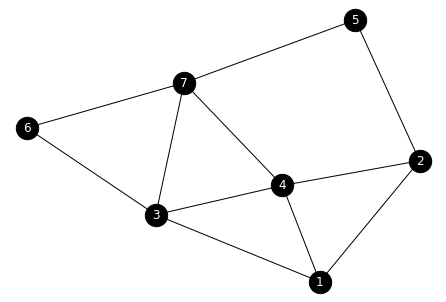

In [7]:
### let's create the adjacency matrix in Fig. 4
# first create a matrix full of zero
A = np.array([
    [0,1,1,1,0,0,0],
    [1,0,0,1,1,0,0],
    [1,0,0,1,0,1,1],
    [1,1,1,0,0,0,1],
    [0,1,0,0,0,0,1],
    [0,0,1,0,0,0,1],
    [0,0,1,1,1,1,0]
])

# then draw the graph from the adjacency matrix
G = nx.from_numpy_matrix(A)  
# numpy arrays are 0-indexed, let's convert it to be 1-indexed
mapping = {k:"{}".format(k+1) for k in G.nodes()}
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")
plt.show()



## 1.3 adjacency list <a name="adjacency-list"></a>

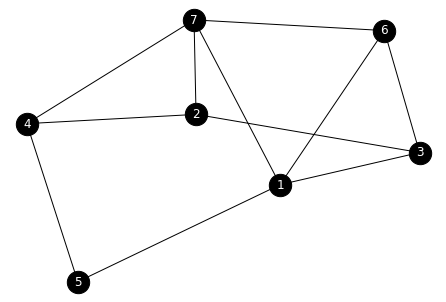

In [8]:
### let's create the adjacency list in Fig. 7
adjacency_list = {
    1: [3, 5, 6, 7],
    2: [3, 4, 7],
    3: [6],
    4: [2, 5],
    5: [],
    6: [1],
    7: [4, 6]
}

converted = []
# convert to edges
for (key, values) in adjacency_list.items():
    for val in values:
        converted.append("%d %d"%(key, val))
G = nx.parse_edgelist(converted, nodetype = int)
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")

# 2 paths and cycles <a name="paths-and-cycles"></a>
## 2.1 matrix production <a name="matrix-production"></a>

In [9]:
## Matrix multiplication
# let's take exercise 4 as an example

In [10]:
A = np.array([
    [-1,-1,0],
    [5, 4, 6],
    [2, -4, 5]
])
B = np.array([
    [1, 6, 5],
    [5, -3, 4],
    [-4, 5, -3]
])

In [11]:
# there are multiple ways to do matrix multiplication in Python
# 1.use np.dot
print(np.dot(A, B))
# 2. use np.matmul
print(np.matmul(A, B))
# 2. use @
print(A@B)

[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]
[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]
[[ -6  -3  -9]
 [  1  48  23]
 [-38  49 -21]]


In [12]:
## use reduce to multiply a chain of matrix
from functools import reduce
# suppose we want to get A@A@A@A@A
n = 5
matrix_chain = [A] * n
reduce(np.dot, matrix_chain)

array([[  1100,   1685,    954],
       [-10333,  -3509, -15834],
       [  -508,  10874,  -6943]])

## 2.2 Find connected components of an undirected network <a name="connected-components"></a>

In [13]:
# let's try to find connected components in undirected networks

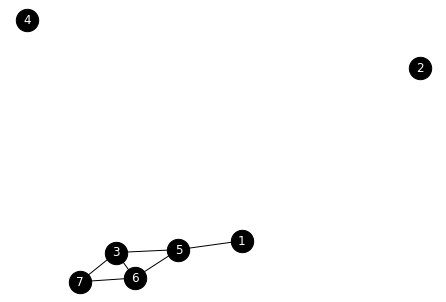

In [14]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,5), (3,5), (3,6), (3,7), (5,6), (6,7)])
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")

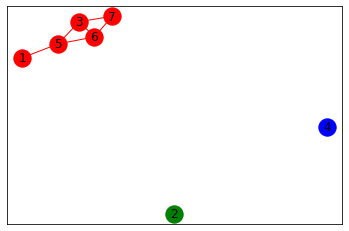

In [15]:
# let's color different components
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]
connected_components = list(G.subgraph(c) for c in nx.connected_components(G))
spring_pos = nx.spring_layout(G)
for index, subgraph in enumerate(connected_components): 
    nx.draw_networkx(subgraph, pos = spring_pos, node_color = colorlist[index], edge_color = colorlist[index])

## 2.3 Find Euclerian cycles and paths <a name="euclerian"></a>

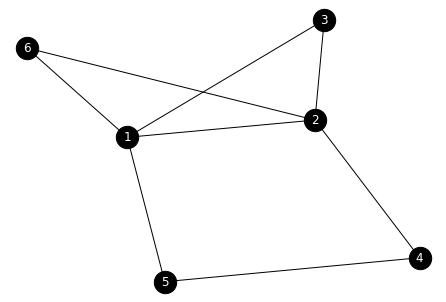

In [16]:
# let's  take exercise 11.(c) as an example
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,5), (1,6), (2,3), (2,4), (2,6), (4,5)])
nx.draw(G, with_labels=True, node_size=500, node_color="black", font_color="white")

In [17]:
if nx.has_eulerian_path(G):
    print("Eulerian path")
    print(list(nx.eulerian_path(G)))
print("Eulerian cycle")
print(list(nx.eulerian_circuit(G)))

Eulerian path
[(1, 6), (6, 2), (2, 4), (4, 5), (5, 1), (1, 3), (3, 2), (2, 1)]
Eulerian cycle
[(1, 6), (6, 2), (2, 4), (4, 5), (5, 1), (1, 3), (3, 2), (2, 1)]
